**House price prediction**


The problem statement is to predict the property price which will helps to overall market condition and the economic health of a country.

Attributes of the dataset:
1.   POSTED_BY: Who has posted the property
2.   UNDER_CONSTRUCTION: Whether the property is under     construction or not
1.   RERA: Real Estate Regulatory Authority, stands for   transparency in the real estate industry. It was brought to action to eradicate the existing discrepancies and problems within the sector.
2.   BHK_NO: number of rooms in the house
1.   BHK_OR_RK: type of the Property whether it BHK or RK
2.   SQUARE_FT: Size of the property in square feet
1.   READY_TO_MOVE: This is the property which is ready for sale/move or not 
2.   RESALE: Property which are resaled
1.   ADDRESS: Physical location of the property
2.   LONGITUDE: Longitude is the measurement east or west of the prime meridian. Longitude is measured by imaginary lines that run around Earth vertically (up and down) and meet at the North and South Poles. These lines are known as meridians. Each meridian measures one arc degree of longitude.
1.   LATITUDE: Latitude is the measurement of distance north or south of the Equator. It is measured with 180 imaginary lines that form circles around Earth east-west, parallel to the Equator. These lines are known as parallels. A circle of latitude is an imaginary ring linking all points sharing a parallel.
2.   TARGET(PRICE_IN_LACS): Price of the property in lakhs















In [ ]:
# importing the required libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.metrics import mean_absolute_error, mean_squared_error

**Importing the datasets**

In [ ]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [ ]:
train.head(5)# prints the first five rows of the train dataset

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [ ]:
test.head(5)# prints the first five rows of the test dataset

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
0,Owner,0,0,1,BHK,545.171340,1,1,"Kamrej,Surat",21.262000,73.047700
1,Dealer,1,1,2,BHK,800.000000,0,0,"Panvel,Lalitpur",18.966114,73.148278
2,Dealer,0,0,2,BHK,1257.096513,1,1,"New Town,Kolkata",22.592200,88.484911
3,Dealer,0,0,3,BHK,1400.329489,1,1,"Kalwar Road,Jaipur",26.988300,75.584600
4,Owner,0,0,1,BHK,430.477830,1,1,"Mai Mandir,Nadiad",22.700000,72.870000


In [ ]:
# Check for shape of both datasets 
print(train.shape)
print(   )
print(test.shape)

(29451, 12)

(68720, 11)


In [ ]:
train.tail(5) # prints last five rows of a train dataset along with all columns 

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
29446,Owner,0,0,3,BHK,2500.000000,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0
29447,Owner,0,0,2,BHK,769.230769,1,1,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721,16.0
29448,Dealer,0,0,2,BHK,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1
29449,Owner,0,0,2,BHK,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0
29450,Dealer,0,1,2,BHK,896.774194,1,1,"Jagatpura,Jaipur",26.832353,75.841749,27.8


In [ ]:
test.tail(5) # prints last five rows of a test dataset along with all columns 

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
68715,Dealer,0,1,2,BHK,856.555505,1,1,"Thane West,Maharashtra",19.180000,72.963330
68716,Dealer,0,1,3,BHK,2304.147465,1,1,"Sector-66A Mohali,Mohali",30.661104,76.746082
68717,Dealer,1,1,1,BHK,33362.792750,0,0,"Balkum,Maharashtra",19.222101,72.988231
68718,Dealer,0,0,2,BHK,1173.708920,1,1,"Hadapsar,Pune",18.496670,73.941670
68719,Dealer,0,0,3,BHK,2439.532944,1,1,"Hiranandani Gardens - Powai,Mumbai",19.124896,72.893503


**Printing the non-null values present in the columns**

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68720 entries, 0 to 68719
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   POSTED_BY           68720 non-null  object 
 1   UNDER_CONSTRUCTION  68720 non-null  int64  
 2   RERA                68720 non-null  int64  
 3   BHK_NO.             68720 non-null  int64  
 4   BHK_OR_RK           68720 non-null  object 
 5   SQUARE_FT           68720 non-null  float64
 6   READY_TO_MOVE       68720 non-null  int64  
 7   RESALE              68720 non-null  int64  
 8   ADDRESS             68720 non-null  object 
 9   LONGITUDE           68720 non-null  float64
 10  LATITUDE            68720 non-null  float64
dtypes: float64(3), int64(5), object(3)
memory usage: 5.8+ MB


**Checking for the missing values**

In [ ]:
train.isna().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

In [ ]:
test.isna().sum()

POSTED_BY             0
UNDER_CONSTRUCTION    0
RERA                  0
BHK_NO.               0
BHK_OR_RK             0
SQUARE_FT             0
READY_TO_MOVE         0
RESALE                0
ADDRESS               0
LONGITUDE             0
LATITUDE              0
dtype: int64

It can be observe that there is no missing values in the both files 

In [ ]:
train.nunique()

POSTED_BY                    3
UNDER_CONSTRUCTION           2
RERA                         2
BHK_NO.                     16
BHK_OR_RK                    2
SQUARE_FT                19561
READY_TO_MOVE                2
RESALE                       2
ADDRESS                   6899
LONGITUDE                 4087
LATITUDE                  4078
TARGET(PRICE_IN_LACS)     1172
dtype: int64

In [ ]:
test.nunique()

POSTED_BY                 3
UNDER_CONSTRUCTION        2
RERA                      2
BHK_NO.                  17
BHK_OR_RK                 2
SQUARE_FT             37704
READY_TO_MOVE             2
RESALE                    2
ADDRESS               11048
LONGITUDE              5907
LATITUDE               5914
dtype: int64

**Checking for the duplicated values in the dataset and drop the duplicated values if present**

In [ ]:
train[train.duplicated()] # it selects the duplicated values in train dataset

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
1904,Dealer,1,0,3,BHK,1209.628644,0,1,"Salt Lake,Kolkata",22.541110,88.337780,100.0
2351,Dealer,0,0,2,BHK,896.680112,1,1,"Zirakpur,Chandigarh",30.662283,76.822397,28.9
2611,Dealer,0,0,3,BHK,1350.256549,1,1,"Sector 78 Faridabad,Faridabad",28.380160,77.369936,50.0
2618,Dealer,1,0,2,BHK,800.000000,0,1,"Chandapura,Bangalore",12.800090,77.711820,27.0
3211,Owner,0,0,2,BHK,712.105799,1,1,"BataNagar,Kolkata",22.506860,88.223965,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...
29321,Dealer,0,1,1,BHK,649.641577,1,1,"Zirakpur,Chandigarh",30.662283,76.822397,14.5
29345,Dealer,1,1,3,BHK,1563.155686,0,1,"Sector-88 Mohali,Mohali",30.684523,76.691728,74.5
29357,Owner,0,1,3,BHK,1446.201311,1,1,"Sector-70 Noida,Noida",28.596320,77.381430,75.0
29389,Builder,1,0,3,BHK,979.290979,0,0,"Barasat,Kolkata",22.747639,88.600902,27.9


In [ ]:
train.drop_duplicates(keep='first', inplace=True) # droping the duplicated values in the train dataset, The keep='first' argument tells the method to keep the first occurrence of each duplicated row and remove the subsequent occurrences. The inplace=True argument tells the method to modify the original DataFrame rather than creating a new copy

In [ ]:
train[train.duplicated()] # here can observe that the duplicated values are removed

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)


Duplicate entries can ruin the split between train, validation, and test sets where identical entries are not all in the same set. This can lead to biased performance estimates that result in disappointing the model in production.

In [ ]:
test[test.duplicated()] # it selects the duplicated values in test dataset

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
150,Owner,0,0,2,BHK,1304.347826,1,1,"Sector 88 Faridabad,Faridabad",28.431862,77.351104
631,Dealer,0,1,2,BHK,820.232399,1,1,"Pholriwal,Jalandhar",31.261414,75.589997
1165,Dealer,0,1,2,BHK,1250.000000,1,1,"Banashankari Stage V,Bangalore",12.922300,77.553200
1457,Dealer,0,1,3,BHK,1724.137931,1,1,"Kundalahalli,Bangalore",12.970450,77.712284
1897,Owner,1,1,2,BHK,1250.000000,0,1,"Milakpur Goojar,Bhiwadi",28.194910,76.826552
...,...,...,...,...,...,...,...,...,...,...,...
68626,Dealer,0,0,4,BHK,2050.345108,1,1,"Sector-15 Bahadurgarh,Bahadurgarh",30.752321,76.772816
68662,Owner,0,0,2,BHK,1045.068583,1,1,"Sector-137 Noida,Noida",28.506454,77.409568
68685,Dealer,0,1,2,BHK,341.933478,1,0,"Purseni,Lucknow",26.707154,80.982346
68698,Dealer,1,1,3,BHK,1284.615385,0,0,"Sector-150 Noida,Noida",28.429614,77.481711


In [ ]:
test.drop_duplicates(keep='first', inplace=True) # droping the duplicated values in the test dataset, The keep='first' argument tells the method to keep the first occurrence of each duplicated row and remove the subsequent occurrences. The inplace=True argument tells the method to modify the original DataFrame rather than creating a new copy

In [ ]:
test[test.duplicated()] # here can observe that the duplicated values are removed

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE


In [ ]:
# Check for shape of both datasets after droping the duplicated values 
print(train.shape)
print(   )
print(test.shape)

(29050, 12)

(66250, 11)


**visualization**

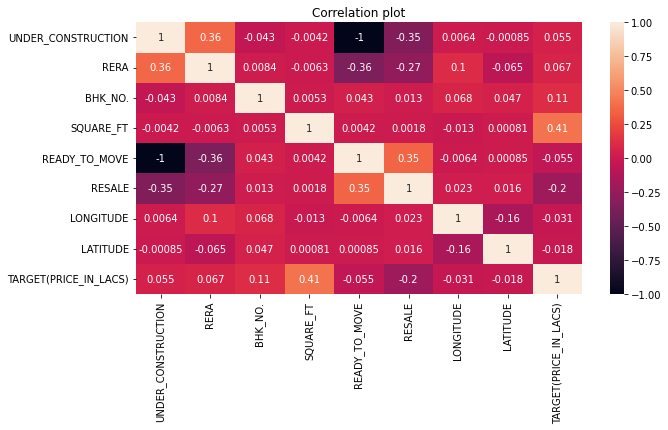

In [ ]:
# checking the correlation between the features of the train dataframe by ploting heatmap correlation
train_corr = train.corr() # finding the correlation of the each columns in the train dataframe, the correlation matrix to be visualized
plt.figure(figsize=(10,5)) # specify the width and height of the plot
trainplot = sns.heatmap(train_corr, annot=True,) # create a heatmap plot of a correlation matrix called "train_corr", with annotations displayed on the plot. "annot=True": enables the display of annotations on the heatmap, showing the correlation values for each pair of variables.
plt.title('Correlation plot') # giving the title to the plot 
plt.show() # display the figure

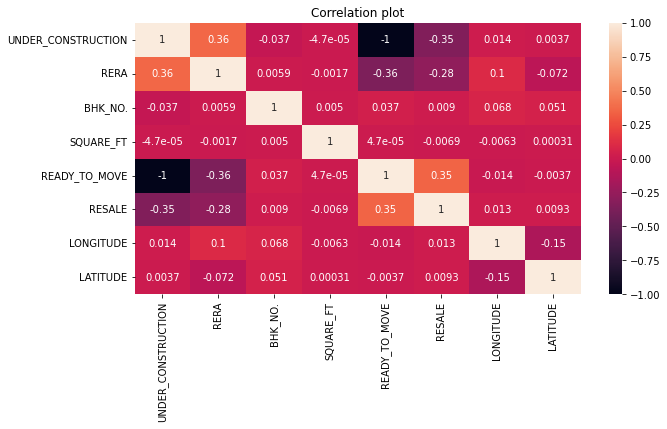

In [ ]:
# checking the correlation between the features of the train dataframe by ploting heatmap correlation
test_corr = test.corr() # finding the correlation of the each columns in the train dataframe, the correlation matrix to be visualized
plt.figure(figsize=(10,5)) # specify the width and height of the plot
testplot = sns.heatmap(test_corr, annot=True,) # create a heatmap plot of a correlation matrix called "train_corr", with annotations displayed on the plot. "annot=True": enables the display of annotations on the heatmap, showing the correlation values for each pair of variables.
plt.title('Correlation plot') # giving the title to the plot 
plt.show() # display the figure

From the plot it can be observe the address does'nt have correlation between the features, so we can remove the address column.

In [ ]:
train.drop(['ADDRESS'], axis=1, inplace=True) # droping the address column 
test.drop(['ADDRESS'], axis=1, inplace=True) 

In [ ]:
print(train.shape)
print(   )
print(test.shape)

(29050, 11)

(66250, 10)


**Converting categorical values to numerical values**

In [ ]:
train.dtypes

POSTED_BY                 object
UNDER_CONSTRUCTION         int64
RERA                       int64
BHK_NO.                    int64
BHK_OR_RK                 object
SQUARE_FT                float64
READY_TO_MOVE              int64
RESALE                     int64
LONGITUDE                float64
LATITUDE                 float64
TARGET(PRICE_IN_LACS)    float64
dtype: object

In [ ]:
# converting categorical values to numerical values 
train = pd.get_dummies(data=train, columns=['POSTED_BY', 'BHK_OR_RK'], drop_first=True)
train.head()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),POSTED_BY_Dealer,POSTED_BY_Owner,BHK_OR_RK_RK
0,0,0,2,1300.236407,1,1,12.969910,77.597960,55.0,0,1,0
1,0,0,2,1275.000000,1,1,12.274538,76.644605,51.0,1,0,0
2,0,0,2,933.159722,1,1,12.778033,77.632191,43.0,0,1,0
3,0,1,2,929.921143,1,1,28.642300,77.344500,62.5,0,1,0
4,1,0,2,999.009247,0,1,22.592200,88.484911,60.5,1,0,0


In [ ]:
train.dtypes

UNDER_CONSTRUCTION         int64
RERA                       int64
BHK_NO.                    int64
SQUARE_FT                float64
READY_TO_MOVE              int64
RESALE                     int64
LONGITUDE                float64
LATITUDE                 float64
TARGET(PRICE_IN_LACS)    float64
POSTED_BY_Dealer           uint8
POSTED_BY_Owner            uint8
BHK_OR_RK_RK               uint8
dtype: object

In [ ]:
  test.dtypes

POSTED_BY              object
UNDER_CONSTRUCTION      int64
RERA                    int64
BHK_NO.                 int64
BHK_OR_RK              object
SQUARE_FT             float64
READY_TO_MOVE           int64
RESALE                  int64
LONGITUDE             float64
LATITUDE              float64
dtype: object

In [ ]:
test = pd.get_dummies(data=test, columns=['POSTED_BY', 'BHK_OR_RK'], drop_first=True)
test.head(5)

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,POSTED_BY_Dealer,POSTED_BY_Owner,BHK_OR_RK_RK
0,0,0,1,545.171340,1,1,21.262000,73.047700,0,1,0
1,1,1,2,800.000000,0,0,18.966114,73.148278,1,0,0
2,0,0,2,1257.096513,1,1,22.592200,88.484911,1,0,0
3,0,0,3,1400.329489,1,1,26.988300,75.584600,1,0,0
4,0,0,1,430.477830,1,1,22.700000,72.870000,0,1,0


In [ ]:
test.dtypes

UNDER_CONSTRUCTION      int64
RERA                    int64
BHK_NO.                 int64
SQUARE_FT             float64
READY_TO_MOVE           int64
RESALE                  int64
LONGITUDE             float64
LATITUDE              float64
POSTED_BY_Dealer        uint8
POSTED_BY_Owner         uint8
BHK_OR_RK_RK            uint8
dtype: object

In [ ]:
print(train.shape)
print(   )
print(test.shape)

(29050, 12)

(66250, 11)


**Spliting the dataset to train**

In [ ]:
X = train.drop('TARGET(PRICE_IN_LACS)', axis=True).values


In [ ]:
y = train['TARGET(PRICE_IN_LACS)'].values


In [ ]:
print(X.shape)
print(Y.shape)

(29050, 11)
(29050,)


In [ ]:
test.shape

(66250, 11)

In [ ]:
class DecisionTreeRegressor:
    def __init__(self, max_depth=None, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.tree = None

    def mean_squared_error(self, y):
        return np.mean((y - np.mean(y)) ** 2)

    def split_data(self, X, y, feature_idx, threshold):
        left_mask = X[:, feature_idx] <= threshold
        right_mask = X[:, feature_idx] > threshold
        X_left, y_left = X[left_mask], y[left_mask]
        X_right, y_right = X[right_mask], y[right_mask]
        return X_left, y_left, X_right, y_right

    def find_best_split(self, X, y):
        best_feature_idx, best_threshold, best_mse = None, None, np.inf
        for feature_idx in range(X.shape[1]):
            for threshold in np.unique(X[:, feature_idx]):
                X_left, y_left, X_right, y_right = self.split_data(X, y, feature_idx, threshold)
                if len(y_left) < self.min_samples_split or len(y_right) < self.min_samples_split:
                    continue
                mse_left, mse_right = self.mean_squared_error(y_left), self.mean_squared_error(y_right)
                mse = mse_left + mse_right
                if mse < best_mse:
                    best_feature_idx, best_threshold, best_mse = feature_idx, threshold, mse
        return best_feature_idx, best_threshold, best_mse

    def build_tree(self, X, y, depth):
        if depth == self.max_depth or len(y) < self.min_samples_split:
            return np.mean(y)
        feature_idx, threshold, mse = self.find_best_split(X, y)
        if mse == np.inf:
            return np.mean(y)
        X_left, y_left, X_right, y_right = self.split_data(X, y, feature_idx, threshold)
        left_node = self.build_tree(X_left, y_left, depth + 1)
        right_node = self.build_tree(X_right, y_right, depth + 1)
        return {"feature_idx": feature_idx, "threshold": threshold, "left_node": left_node, "right_node": right_node}

    def fit(self, X, y):
        self.tree = self.build_tree(X, y)

    def predict(self, X):
        def predict_row(row, node):
            if isinstance(node, float):
                return node
            if row[node["feature_idx"]] <= node["threshold"]:
                return predict_row(row, node["left_node"])
            else:
                return predict_row(row, node["right_node"])
        return np.array([predict_row(row, self.tree) for row in X])
    def mean_squared_errorr(self,y_true, y_pred):
   
      # Check if the lengths of both arrays are equal
      if len(y_true) != len(y_pred):
          raise ValueError("Length of y_true and y_pred should be the same.")
      
      # Calculate the squared differences between the true and predicted values
      squared_differences = [(y_true[i] - y_pred[i])**2 for i in range(len(y_true))]
      
      # Calculate the mean of the squared differences
      mse = sum(squared_differences) / len(squared_differences)
      
      return mse
      # writing  function for r2_score (R2 = 1 - (SSres / SStot))
    def r2(self,y_true, y_pred):
      # Calculate the mean of the true values
      y_true_mean = sum(y_true) / len(y_true)
      # Calculate the total sum of squares (TSS)
      tss = sum((y_true - y_true_mean) ** 2)
      # Calculate the residual sum of squares (RSS)
      rss = sum((y_true - y_pred) ** 2)
      # Calculate the R-squared value
      r2_score = 1 - (rss / tss)
      return r2_score

In [ ]:
class Node():
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, var_red=None, value=None):
        ''' constructor ''' 
        
        # for decision node
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.var_red = var_red
        
        # for leaf node
        self.value = value

In [ ]:
class RandomForestRegressor:
    def __init__(self, n_estimators=100, max_depth=None, min_samples_split=2):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
      
       
        self.trees = []

    def fit(self, X, y):
     
          for i in range(self.n_estimators):
            
                indices = np.random.choice(X.shape[0], size=X.shape[0], replace=True) # The size parameter is set to X.shape[0], which means that the entire dataset is sampled with replacement. This is known as bagging, and it is a key technique used in random forests to improve the model's performance and reduce overfitting. 
                X_subset = X[indices]
                y_subset = y[indices]
                tree = DecisionTreeRegressor(max_depth=self.max_depth, 
                                              min_samples_split=self.min_samples_split
                                             
                                              )
                tree.fit(X_subset, y_subset)
                self.trees.append(tree)
    def predict(self, X):
        y_preds = np.zeros((X.shape[0], len(self.trees)))
        for i, tree in enumerate(self.trees):
            y_preds[:, i] = tree.predict(X)
        return np.mean(y_preds, axis=1)            
    def mean_squared_error(self,y_true, y_pred):
   
      # Check if the lengths of both arrays are equal
      if len(y_true) != len(y_pred):
          raise ValueError("Length of y_true and y_pred should be the same.")
      
      # Calculate the squared differences between the true and predicted values
      squared_differences = [(y_true[i] - y_pred[i])**2 for i in range(len(y_true))]
      
      # Calculate the mean of the squared differences
      mse = sum(squared_differences) / len(squared_differences)
      
      return mse
    def r2(self,y_true, y_pred):
      # Calculate the mean of the true values
      y_true_mean = sum(y_true) / len(y_true)
      # Calculate the total sum of squares (TSS)
      tss = sum((y_true - y_true_mean) ** 2)
      # Calculate the residual sum of squares (RSS)
      rss = sum((y_true - y_pred) ** 2)
      # Calculate the R-squared value
      r2_score = 1 - (rss / tss)
      return r2_score
      
        
       
  
      
      
      
      
      
      
      
      


      

In [ ]:
# splitting into x_train, y_train, x_test, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(23240, 11)
(23240,)
(5810, 11)
(5810,)


**Model building**

In [ ]:
rfr = RandomForestRegressor(n_estimators=10, max_depth=4, min_samples_split=2)
rfr.fit(X_train,y_train)

In [ ]:
y_pred = rfr.predict(X_test)

In [ ]:
y_pred

array([140.71777131, 140.71777131, 140.71777131, ..., 140.71777131,
       140.71777131, 140.71777131])

In [ ]:
mse = rfr.mean_squared_error(y_test, y_pred)
mse

476044.53375910595

In [ ]:
r2 = rfr.r2(y_test, y_pred)

In [ ]:
r2

0.1306185146743173